In [ ]:
import os
import math
import random
import operator 
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import datetime as dt
from datetime import timedelta
import seaborn as sns
from tqdm import tqdm
import statistics as stat
from  statsmodels.tsa.arima_model import ARIMA
#import xgboost
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import NuSVR

plt.style.use('fivethirtyeight')
%matplotlib inline 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-06-2020.csv')
#us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/05-06-2020.csv')

In [ ]:
df_bd_con =df_confirmed[df_confirmed['Country/Region']=='Bangladesh']
df_bd_deaths=df_deaths[df_deaths['Country/Region']=='Bangladesh']
df_bd_recovered=df_recovered[df_recovered['Country/Region']=='Bangladesh']

In [ ]:
#world_data
col_names = df_confirmed.keys()
confirmed = df_confirmed.loc[:, col_names[4]:col_names[-1]]
deaths = df_deaths.loc[:, col_names[4]:col_names[-1]]
recoveries = df_recovered.loc[:, col_names[4]:col_names[-1]]

In [ ]:
#Bangladesh Data
col_names=df_bd_con.keys()
bd_confirmed=df_bd_con.loc[:, col_names[50]:col_names[-1]]
bd_deaths=df_bd_deaths.loc[:, col_names[50]:col_names[-1]]
bd_recovered=df_bd_recovered.loc[:, col_names[50]:col_names[-1]]


In [ ]:
#India Data
df_ind_con =df_confirmed[df_confirmed['Country/Region']=='India']
df_ind_deaths=df_deaths[df_deaths['Country/Region']=='India']
df_ind_recovered=df_recovered[df_recovered['Country/Region']=='India']

col_names=df_ind_con.keys()
ind_confirmed=df_ind_con.loc[:, col_names[12]:col_names[-1]]
ind_deaths=df_ind_deaths.loc[:, col_names[12]:col_names[-1]]
ind_recovered=df_ind_recovered.loc[:, col_names[4]:col_names[-1]]

In [ ]:
#Pakistan
df_pak_con =df_confirmed[df_confirmed['Country/Region']=='Pakistan']
df_pak_deaths=df_deaths[df_deaths['Country/Region']=='Pakistan']
df_pak_recovered=df_recovered[df_recovered['Country/Region']=='Pakistan']

col_names=df_pak_con.keys()
pak_confirmed=df_pak_con.loc[:, col_names[38]:col_names[-1]]
pak_deaths=df_pak_deaths.loc[:, col_names[38]:col_names[-1]]
pak_recovered=df_pak_recovered.loc[:, col_names[38]:col_names[-1]]

In [ ]:
#Sri Lanka
df_sri_con =df_confirmed[df_confirmed['Country/Region']=='Sri Lanka']
df_sri_deaths=df_deaths[df_deaths['Country/Region']=='Sri Lanka']
df_sri_recovered=df_recovered[df_recovered['Country/Region']=='Sri Lanka']

col_names=df_sri_con.keys()
sri_confirmed=df_sri_con.loc[:, col_names[9]:col_names[-1]]
sri_deaths=df_sri_deaths.loc[:, col_names[9]:col_names[-1]]
sri_recovered=df_sri_recovered.loc[:, col_names[9]:col_names[-1]]

In [ ]:
#Nepal
df_nep_con =df_confirmed[df_confirmed['Country/Region']=='Nepal']
df_nep_deaths=df_deaths[df_deaths['Country/Region']=='Nepal']
df_nep_recovered=df_recovered[df_recovered['Country/Region']=='Nepal']

col_names=df_nep_con.keys()
nep_confirmed=df_nep_con.loc[:, col_names[7]:col_names[-1]]
nep_deaths=df_nep_deaths.loc[:, col_names[7]:col_names[-1]]
nep_recovered=df_nep_recovered.loc[:, col_names[7]:col_names[-1]]

In [ ]:
#Afghanistan
df_afg_con =df_confirmed[df_confirmed['Country/Region']=='Afghanistan']
df_afg_deaths=df_deaths[df_deaths['Country/Region']=='Afghanistan']
df_afg_recovered=df_recovered[df_recovered['Country/Region']=='Afghanistan']

col_names=df_afg_con.keys()
afg_confirmed=df_afg_con.loc[:, col_names[37]:col_names[-1]]
afg_deaths=df_afg_deaths.loc[:, col_names[37]:col_names[-1]]
afg_recovered=df_afg_recovered.loc[:, col_names[37]:col_names[-1]]

In [ ]:
#Maldives
df_mal_con =df_confirmed[df_confirmed['Country/Region']=='Maldives']
df_mal_deaths=df_deaths[df_deaths['Country/Region']=='Maldives']
df_mal_recovered=df_recovered[df_recovered['Country/Region']=='Maldives']

col_names=df_mal_con.keys()
mal_confirmed=df_mal_con.loc[:, col_names[50]:col_names[-1]]
mal_deaths=df_mal_deaths.loc[:, col_names[50]:col_names[-1]]
mal_recovered=df_mal_recovered.loc[:, col_names[50]:col_names[-1]]

In [ ]:
#Bhutan
df_bhu_con =df_confirmed[df_confirmed['Country/Region']=='Bhutan']
df_bhu_deaths=df_deaths[df_deaths['Country/Region']=='Bhutan']
df_bhu_recovered=df_recovered[df_recovered['Country/Region']=='Bhutan']

col_names=df_bhu_con.keys()
bhu_confirmed=df_bhu_con.loc[:, col_names[48]:col_names[-1]]
bhu_deaths=df_bhu_deaths.loc[:, col_names[48]:col_names[-1]]
bhu_recovered=df_bhu_recovered.loc[:, col_names[48]:col_names[-1]]

In [ ]:
bd_deaths.head()

,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,...,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20
20,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,3,4,5,5,5,5,5,5,5,6,6,6,8,9,12,17,20,21,27,30,34,39,46,50,60,...,1388,1425,1464,1502,1545,1582,1621,1661,1695,1738,1783,1847,1888,1926,1968,1997,2052,2096,2151,2197,2238,2275,2305,2352,2391,2424,2457,2496,2547,2581,2618,2668,2709,2751,2801,2836,2874,2928,2965,3000


In [ ]:
def day_wise_simu(dates,confirmed,deaths,recovered):
  dates = confirmed.keys()
  total_cases=[]
  total_deaths=[]
  recovery_rates = []
  mortality_rates=[]
  total_recovered = []
  total_active = []
  for i in tqdm(dates):
    confirmed_sum = confirmed[i].sum() # daily wise sumation
    death_sum = deaths[i].sum()
    recovered_sum = recovered[i].sum()
    total_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum - death_sum - recovered_sum)
    mortality_rates.append(death_sum / confirmed_sum) # mortality = summatin of death / summation of confirmed cases
    recovery_rates.append(recovered_sum / confirmed_sum)
  return total_cases,total_deaths,total_recovered

In [ ]:
#Bangladesh
bd_total_cases,bd_total_deaths,bd_total_recovered=day_wise_simu(bd_confirmed.keys(),bd_confirmed,bd_deaths,bd_recovered)

100%|██████████| 143/143 [00:00<00:00, 2741.84it/s]


In [ ]:
#India
ind_total_cases,ind_total_deaths,ind_total_recovered=day_wise_simu(ind_confirmed.keys(),ind_confirmed,ind_deaths,ind_recovered)

100%|██████████| 181/181 [00:00<00:00, 2806.75it/s]


In [ ]:
#Pakistan
pak_total_cases,pak_total_deaths,pak_total_recovered=day_wise_simu(pak_confirmed.keys(),pak_confirmed,pak_deaths,pak_recovered)

100%|██████████| 155/155 [00:00<00:00, 2677.81it/s]


In [ ]:
#Sri Lanka
sri_total_cases,sri_total_deaths,sri_total_recovered=day_wise_simu(sri_confirmed.keys(),sri_confirmed,sri_deaths,sri_recovered)

100%|██████████| 184/184 [00:00<00:00, 2826.96it/s]


In [ ]:
#Nepal
nep_total_cases,nep_total_deaths,nep_total_recovered=day_wise_simu(nep_confirmed.keys(),nep_confirmed,nep_deaths,nep_recovered)

100%|██████████| 186/186 [00:00<00:00, 2820.53it/s]


In [ ]:
#Afghanistan
afg_total_cases,afg_total_deaths,afg_total_recovered=day_wise_simu(afg_confirmed.keys(),afg_confirmed,afg_deaths,afg_recovered)

100%|██████████| 156/156 [00:00<00:00, 2699.33it/s]


In [ ]:
#Maldives
mal_total_cases,mal_total_deaths,mal_total_recovered=day_wise_simu(mal_confirmed.keys(),mal_confirmed,mal_deaths,mal_recovered)

100%|██████████| 143/143 [00:00<00:00, 2051.72it/s]


In [ ]:
#Bhutan
bhu_total_cases,bhu_total_deaths,bhu_total_recovered=day_wise_simu(bhu_confirmed.keys(),bhu_confirmed,bhu_deaths,bhu_recovered)

100%|██████████| 145/145 [00:00<00:00, 2250.25it/s]


In [ ]:

# dates = bd_confirmed.keys()
# bd_cases=[]
# total_deaths=[]
# recovery_rates = []
# mortality_rates=[]
# total_recovered = []
# total_active = []

In [ ]:
# for i in tqdm(dates):
#     confirmed_sum = bd_confirmed[i].sum() # daily wise sumation
#     death_sum = bd_deaths[i].sum()
#     recovered_sum = bd_recovered[i].sum()
#     bd_cases.append(confirmed_sum)
#     total_deaths.append(death_sum)
#     total_recovered.append(recovered_sum)
#     total_active.append(confirmed_sum - death_sum - recovered_sum)
#     mortality_rates.append(death_sum / confirmed_sum) # mortality = summatin of death / summation of confirmed cases
#     recovery_rates.append(recovered_sum / confirmed_sum)

In [ ]:
# def daily_increase(data):
#     d = [] 
#     for i in range(len(data)):
#         if i == 0:
#             d.append(data[0])
#         else:
#             d.append(data[i]-data[i-1])
#     return d 

In [ ]:
#confirmed_case
# bd_daily_con_increase=daily_increase(bd_cases)
# #death_case
# bd_daily_death_increase=daily_increase(total_deaths)
# #Recovery Case
# bd_daily_rec_increase=daily_increase(total_recovered)

In [ ]:
#Bangladesh
days_since_3_8 = np.array([i for i in range(len(bd_confirmed.keys()))]).reshape(-1,1)
# bd_total_cases = np.array(bd_total_cases).reshape(-1,1)
# bd_total_cases[120]
#bd_total_deaths[100]

In [ ]:
#India
days_since_1_30 = np.array([i for i in range(len(ind_confirmed.keys()))]).reshape(-1,1)
ind_total_cases = np.array(ind_total_cases).reshape(-1,1)
ind_total_cases.shape

(181, 1)

In [ ]:
#Pakistan
days_since_2_25 = np.array([i for i in range(len(pak_confirmed.keys()))]).reshape(-1,1)
pak_total_cases = np.array(pak_total_cases).reshape(-1,1)
pak_total_cases.shape

(155, 1)

In [ ]:
#Sri Lanka
days_since_1_27 = np.array([i for i in range(len(sri_confirmed.keys()))]).reshape(-1,1)
sri_total_cases = np.array(sri_total_cases).reshape(-1,1)
sri_total_cases.shape

(184, 1)

In [ ]:
#Nepal
days_since_1_25 = np.array([i for i in range(len(nep_confirmed.keys()))]).reshape(-1,1)
nep_total_cases = np.array(nep_total_cases).reshape(-1,1)
nep_total_cases.shape

(186, 1)

In [ ]:
#Afghanistan
days_since_2_24 = np.array([i for i in range(len(afg_confirmed.keys()))]).reshape(-1,1)
afg_total_cases = np.array(afg_total_cases).reshape(-1,1)
afg_total_cases.shape

(156, 1)

In [ ]:
#Maldives
days_since_3_8 = np.array([i for i in range(len(mal_confirmed.keys()))]).reshape(-1,1)
mal_total_cases = np.array(mal_total_cases).reshape(-1,1)
mal_total_cases.shape

(143, 1)

In [ ]:
days_since_3_6 = np.array([i for i in range(len(bhu_confirmed.keys()))]).reshape(-1,1)
bhu_total_cases = np.array(bhu_total_cases).reshape(-1,1)
bhu_total_cases.shape

(145, 1)

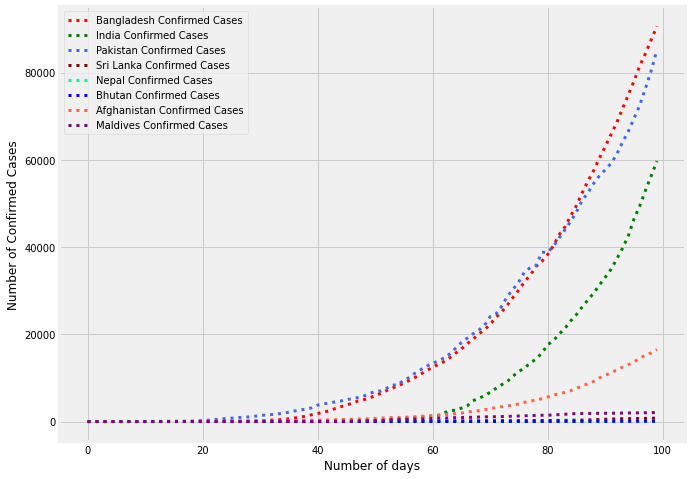

In [ ]:
fig=plt.figure(figsize=(10,8))
plt.plot(bd_total_cases[:100],color='red',linestyle='dotted',lw=3)
plt.plot(ind_total_cases[:100],color='green',linestyle='dotted',lw=3)
plt.plot(pak_total_cases[:100],color='royalblue',linestyle='dotted',lw=3)
plt.plot(sri_total_cases[:100],color='maroon',linestyle='dotted',lw=3)
plt.plot(nep_total_cases[:100],color='mediumspringgreen',linestyle='dotted',lw=3)
plt.plot(bhu_total_cases[:100],color='blue',linestyle='dotted',lw=3)
plt.plot(afg_total_cases[:100],color='tomato',linestyle='dotted',lw=3)
plt.plot(mal_total_cases[:100],color='purple',linestyle='dotted',lw=3)
plt.ylabel('Number of Confirmed Cases')
plt.xlabel('Number of days')
plt.legend(["Bangladesh Confirmed Cases","India Confirmed Cases","Pakistan Confirmed Cases","Sri Lanka Confirmed Cases","Nepal Confirmed Cases","Bhutan Confirmed Cases","Afghanistan Confirmed Cases","Maldives Confirmed Cases"])
fig.savefig('SAARC_Con_fig.png')

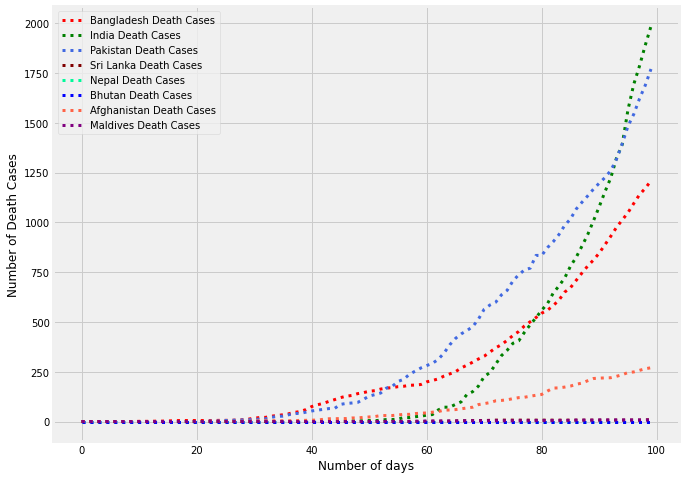

In [ ]:
fig=plt.figure(figsize=(10,8))
plt.plot(bd_total_deaths[:100],color='red',linestyle='dotted',lw=3)
plt.plot(ind_total_deaths[:100],color='green',linestyle='dotted',lw=3)
plt.plot(pak_total_deaths[:100],color='royalblue',linestyle='dotted',lw=3)
plt.plot(sri_total_deaths[:100],color='maroon',linestyle='dotted',lw=3)
plt.plot(nep_total_deaths[:100],color='mediumspringgreen',linestyle='dotted',lw=3)
plt.plot(bhu_total_deaths[:100],color='blue',linestyle='dotted',lw=3)
plt.plot(afg_total_deaths[:100],color='tomato',linestyle='dotted',lw=3)
plt.plot(mal_total_deaths[:100],color='purple',linestyle='dotted',lw=3)
plt.ylabel('Number of Death Cases')
plt.xlabel('Number of days')
plt.legend(["Bangladesh Death Cases","India Death Cases","Pakistan Death Cases","Sri Lanka Death Cases","Nepal Death Cases","Bhutan Death Cases","Afghanistan Death Cases","Maldives Death Cases"])
fig.savefig('SAARC_Death_fig.png')

In [ ]:
dates=bd_confirmed.keys()
dates = dates[:135].copy()
print(dates.shape)
days_in_future = 30 # only 30 days forcasting
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-30]

(135,)


In [ ]:
start = '3/08/2020'
start_date = dt.datetime.strptime(start, '%m/%d/%Y')
f_forcast_dates = []
for i in range(len(future_forcast)):
    f_forcast_dates.append((start_date + dt.timedelta(days=i)).strftime('%m/%d/%Y'))
f_forcast_dates

['03/08/2020',
 '03/09/2020',
 '03/10/2020',
 '03/11/2020',
 '03/12/2020',
 '03/13/2020',
 '03/14/2020',
 '03/15/2020',
 '03/16/2020',
 '03/17/2020',
 '03/18/2020',
 '03/19/2020',
 '03/20/2020',
 '03/21/2020',
 '03/22/2020',
 '03/23/2020',
 '03/24/2020',
 '03/25/2020',
 '03/26/2020',
 '03/27/2020',
 '03/28/2020',
 '03/29/2020',
 '03/30/2020',
 '03/31/2020',
 '04/01/2020',
 '04/02/2020',
 '04/03/2020',
 '04/04/2020',
 '04/05/2020',
 '04/06/2020',
 '04/07/2020',
 '04/08/2020',
 '04/09/2020',
 '04/10/2020',
 '04/11/2020',
 '04/12/2020',
 '04/13/2020',
 '04/14/2020',
 '04/15/2020',
 '04/16/2020',
 '04/17/2020',
 '04/18/2020',
 '04/19/2020',
 '04/20/2020',
 '04/21/2020',
 '04/22/2020',
 '04/23/2020',
 '04/24/2020',
 '04/25/2020',
 '04/26/2020',
 '04/27/2020',
 '04/28/2020',
 '04/29/2020',
 '04/30/2020',
 '05/01/2020',
 '05/02/2020',
 '05/03/2020',
 '05/04/2020',
 '05/05/2020',
 '05/06/2020',
 '05/07/2020',
 '05/08/2020',
 '05/09/2020',
 '05/10/2020',
 '05/11/2020',
 '05/12/2020',
 '05/13/20

#Models

##SVR

In [ ]:
def svm_fun(day,data,X, y, X_test,y_test ,f_forecast, plt,case):
  squared_error = []
  poly_svr = SVR(kernel='poly' ,C =1000.0 ,degree=3, gamma=.015)
  fut_svr = SVR(kernel='poly' ,C =1000.0 ,degree=3, gamma=.015)
  poly_svr.fit(X,y)
  fut_svr.fit(day,data)
  svr_pred = fut_svr.predict(f_forecast)
  svm_test_pred= poly_svr.predict(X_test)
  for j in range(0,len(X_test)):
    # squared_error.append ((y_test[j]-svm_test_pred[j][0])**2) #death case & reco
    squared_error.append ((y_test[j]-svm_test_pred[j])**2) # confirm
  sd = stat.stdev(squared_error)
  weight_svm =  mean_squared_error(svm_test_pred, y_test) / sd
  fig=plt.figure(figsize=(10,5))
  # plt.plot(y_test,linestyle='dotted',lw=3)
  # plt.plot(svm_test_pred,linestyle='dotted',lw=3)
  plt.plot(data,linestyle='dotted',lw=3)
  plt.plot(svr_pred[:135],linestyle='dotted',lw=3)
  if case=="con":
    plt.ylabel('Number of Confirm Cases')
  elif case=="death":
    plt.ylabel('Number of Death Cases')
  else:
    plt.ylabel('Number of Recovery Cases')
  plt.xlabel('Number of days')
  plt.legend([" Test Data ", " SVR Predictions "])
  fig.savefig('svr_reco.png')
  #fig.savefig('/content/drive/My Drive/Covid-test-graph/'+'SVRTest_'+case+'.png')
  print("MAE:", mean_absolute_error(svm_test_pred, y_test))
  print("MSE:", mean_squared_error(svm_test_pred, y_test))
  print("RMSE:", math.sqrt(mean_squared_error(svm_test_pred, y_test)))
  print("RMSE Main:", math.sqrt(mean_squared_error(data, svr_pred[:135])))
  print("W:",weight_svm)

  return svm_test_pred , weight_svm,svr_pred

##NuSVR

In [ ]:
def Nu_svr(day,data,X, y, X_test,y_test ,f_forecast, plt,case):
  squared_error = []
  
  clf = NuSVR(kernel='poly',degree=3,C=1000.0,gamma=.015,nu=0.01)
  nu_fut = NuSVR(kernel='poly',degree=3,C=1000.0,gamma=.015,nu=0.01)
  clf.fit(X,y)
  nu_fut.fit(day,data)
  Nu_svm_test_pred= clf.predict(X_test)
  Nu_svr_pred = nu_fut.predict(f_forecast)

  for j in range(0,len(X_test)):
    squared_error.append ((y_test[j]-Nu_svm_test_pred[j])**2)
    #squared_error.append ((y_test[j]-Nu_svm_test_pred[j][0])**2) #death case & reco
  sd = stat.stdev(squared_error)
  weight_nusvr =  mean_squared_error(Nu_svm_test_pred, y_test) / sd
 
 
  print("MAE:", mean_absolute_error(Nu_svm_test_pred, y_test))
  print("MSE:", mean_squared_error(Nu_svm_test_pred, y_test))
  print("RMSE:", math.sqrt(mean_squared_error(Nu_svm_test_pred, y_test)))
  fig=plt.figure(figsize=(10,5))
  plt.plot(y_test,linestyle='dotted',lw=3)
  plt.plot(Nu_svm_test_pred,linestyle='dotted',lw=3)
  if case=="con":
    plt.ylabel('Number of Confirm Cases')
  elif case=="death":
    plt.ylabel('Number of Death Cases')
  else:
    plt.ylabel('Number of Recovery Cases')
  plt.xlabel('Number of days')
  plt.legend([" Test Data "," NuSVR prediction"])
  #fig.savefig('/content/drive/My Drive/Covid-test-graph/'+'NuSVRTest_'+case+'.png')
  fig.savefig('nusvr_reco.png')
  return Nu_svm_test_pred , weight_nusvr,Nu_svr_pred

##Polynomial Linear Regressiom

In [ ]:
#Polynomial
def polynomial_fun(day,data,X, y, X_test,y_test ,f_forecast, plt,case):
  squared_error = []

  poly = PolynomialFeatures(degree=2)
  poly_f = PolynomialFeatures(degree=2)
  poly_X_train_confirmed = poly.fit_transform(X)
  poly_X_test_confirmed = poly.transform(X_test)

  poly_day = poly_f.fit_transform(day)
  # poly_data = poly_f.transform(data)
  poly_future_forcast = poly_f.transform(f_forecast)

  linear_model = LinearRegression(normalize=True, fit_intercept=False)
  poly_model = LinearRegression(normalize=True, fit_intercept=False)
  linear_model.fit(poly_X_train_confirmed, y)
  poly_model.fit(poly_day,data)

  test_linear_pred = linear_model.predict(poly_X_test_confirmed)

  bangladesh_linear_pred = poly_model.predict(poly_future_forcast)
  for j in range(0,len(X_test)):
    squared_error.append ((y_test[j]-test_linear_pred[j])**2)
    #squared_error.append ((y_test[j]-Nu_svm_test_pred[j][0])**2) #death case & reco

  sd = stat.stdev(squared_error)
  weight_poly =  mean_squared_error(test_linear_pred, y_test) / sd


  print('MAE:', mean_absolute_error(test_linear_pred, y_test))
  print('MSE:',mean_squared_error(test_linear_pred, y_test))
  print('RMSE:',math.sqrt(mean_squared_error(test_linear_pred, y_test)))
  fig=plt.figure(figsize=(10,5))

  plt.plot(y_test,linestyle='dotted',lw=3)
  plt.plot(test_linear_pred,linestyle='dotted',lw=3)
  if case=="con":
    plt.ylabel('Number of Confirm Cases')
  elif case=="death":
    plt.ylabel('Number of Death Cases')
  else:
    plt.ylabel('Number of Recovery Cases')
  plt.xlabel('Number of days')
  plt.legend([' Test Data ', ' Polynomial Regression Predictions '])
  fig.savefig('poly_reco.png')
  #fig.savefig('/content/drive/My Drive/Covid-test-graph/'+'Poly_'+case+'.png')
  return test_linear_pred , weight_poly,bangladesh_linear_pred


##ARIMA

In [ ]:
def ARIMA_fun(day,data,X, y, X_test,y_test ,order,f_forecast, plt,case):
  predictions = list()
  fut_pred=[]
  squared_error = []
  history = [x for x in y]
  history1 = [z for z in data]
  
  for t in range(len(y_test)):
    model = ARIMA(history, order=order)
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = y_test[t]
    history.append(obs)
  #Forecasting
  for t in range(0,30):
    model_f = ARIMA(history1, order=order)
    model_f_fit = model_f.fit(disp=0)
    output1 = model_f_fit.forecast()
    yhat1 = output1[0]
    fut_pred.append(yhat1)
    history1.append(yhat1)

  for j in range(0,len(y_test)):
    squared_error.append ((y_test[j]-predictions[j][0])**2) #death case & reco
  sd = stat.stdev(squared_error)
  weight_ar =  mean_squared_error(predictions, y_test) / sd
  error = mean_squared_error(y_test, predictions)
  RMSE = math.sqrt(error)
  print('Test MSE: %.3f', error)
  print('Test RMSE: %.3f',RMSE)
  # plot
  fut_pred=np.array(fut_pred).reshape(1,-1)[0]
  fig=plt.figure(figsize=(10,5))
  plt.plot(y_test,linestyle='dotted',lw=3)
  plt.plot(predictions,linestyle='dotted',lw=3)
  if case=="con":
    plt.ylabel('Number of Confirm Cases')
  elif case=="death":
    plt.ylabel('Number of Death Cases')
  else:
    plt.ylabel('Number of Recovery Cases')
  plt.xlabel('Number of days')
  plt.legend([" Test Data "," ARIMA prediction"])
  #fig.savefig('/content/drive/My Drive/Covid-test-graph/'+"ARIMATEST_"+case+'.png')
  #fig.savefig('arima_reco.png')
  #print(model_fit.summary())
  return predictions , weight_ar,fut_pred

In [ ]:

def evaluate_arima_model(X,test, arima_order):

	history = [x for x in X]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)

	return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset,test, p_values, d_values, q_values):
  # dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset,test, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
	return best_cfg
 


#Confirmed Case Analysis

In [ ]:
bd_total_cases=bd_total_cases[:135]
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_3_8[:135], bd_total_cases, test_size=0.20, shuffle=False)
print("[Bangladesh: Confirmed cases] Xtrain:{} Ytrain{}".format(len(X_train_confirmed), len(y_train_confirmed))) 

[Bangladesh: Confirmed cases] Xtrain:108 Ytrain108


##SVM

MAE: 8203.91973784987
MSE: 82372059.68533973
RMSE: 9075.905447135274
RMSE Main: 5022.594172731097
W: 1.4854303627095466
165


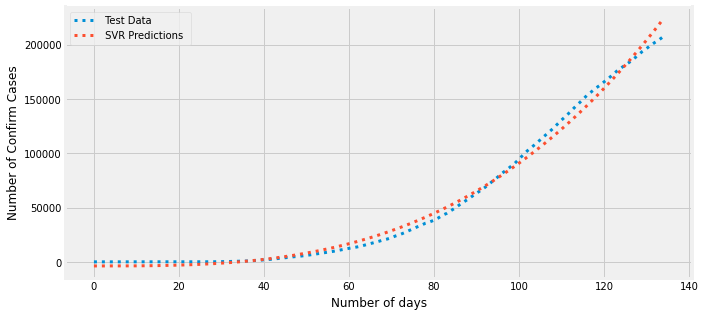

In [ ]:
bd_svm_test, w_svm,bd_svm_pred= svm_fun(days_since_3_8[:135], bd_total_cases,X_train_confirmed, y_train_confirmed, X_test_confirmed, y_test_confirmed, future_forcast, plt,'con')
print(len(bd_svm_pred))

svr try to improve

In [ ]:
# Nu_svm_test_pred= rbf_svr.predict(X_test_confirmed)
# #svm_test_pred= rbf_svr.predict(X_test_confirmed)
# print("MAE:", mean_absolute_error(Nu_svm_test_pred, y_test_confirmed))
# print("MSE:", mean_squared_error(Nu_svm_test_pred, y_test_confirmed))
# print("RMSE:", math.sqrt(mean_squared_error(Nu_svm_test_pred, y_test_confirmed)))
# rbf_svr.score(X_train_confirmed,y_train_confirmed)*100

In [ ]:
# plt.figure(figsize=(16,8))
# plt.scatter(X_test_confirmed,y_test_confirmed,color = 'red',label = 'data')
# plt.plot(X_test_confirmed, rbf_svr.predict(X_test_confirmed), color = 'green',label = 'RBF')
# plt.plot(X_test_confirmed, lin_svr.predict(X_test_confirmed), color = 'blue',label = 'lin')
# plt.plot(X_test_confirmed, poly_nusvr.predict(X_test_confirmed),color = 'purple', label = 'ply')

##ARIMA


In [ ]:
# evaluate parameters
p_values = [0, 1, 2, 3]
d_values = [0, 1, 2]
q_values = [0, 1, 2, 3]
warnings.filterwarnings("ignore")
order=evaluate_models(y_train_confirmed,y_test_confirmed ,p_values, d_values, q_values)

ARIMA(0, 0, 1) MSE=3824226523.752
ARIMA(0, 0, 3) MSE=371467483.887
ARIMA(0, 1, 1) MSE=1479335.711
ARIMA(0, 1, 2) MSE=780621.839
ARIMA(0, 1, 3) MSE=504521.879
ARIMA(0, 2, 1) MSE=129109.065
ARIMA(0, 2, 2) MSE=132887.710
ARIMA(1, 0, 0) MSE=11293508.835
ARIMA(1, 1, 0) MSE=130613.042
ARIMA(1, 2, 0) MSE=133068.835
ARIMA(1, 2, 1) MSE=133461.669
ARIMA(2, 1, 0) MSE=125329.719
ARIMA(2, 2, 0) MSE=137106.583
ARIMA(2, 2, 1) MSE=133753.247
ARIMA(3, 1, 0) MSE=128565.840
ARIMA(3, 2, 0) MSE=135511.281
ARIMA(3, 2, 1) MSE=133364.708
Best ARIMA(2, 1, 0) MSE=125329.719


Test MSE: %.3f 134510.38774866803
Test RMSE: %.3f 366.7565783304616
[210290.34467024 213149.02024854 216029.02585533 218930.36064897
 221853.02783077 224797.02297547 227762.34891734 230749.00455789
 233756.99039931 236786.30677606 239836.95323722 242908.92937173
 246002.23414874 249116.86846654 252252.83418671 255410.12977656
 258588.75668062 261788.71417072 265010.00408487 268252.62438924
 271516.57316766 274801.85252977 278108.46231462 281436.40160774
 284785.6659246  288156.26383315 291548.1896291  294961.44572095
 298396.03195389 301851.9488414 ]
0.7679929668383257


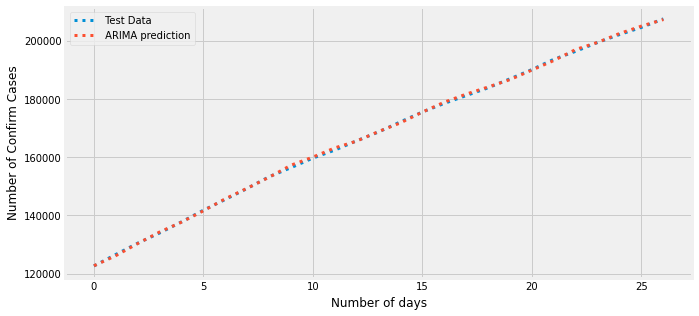

In [ ]:

bd_con_arima_test,w_arima,bd_con_arima_pred = ARIMA_fun(days_since_3_8[:135], bd_total_cases,X_train_confirmed, y_train_confirmed, X_test_confirmed, y_test_confirmed,order, future_forcast, plt,'con')
print((bd_con_arima_pred))
print(w_arima)

##NuSVR

MAE: 7348.320356717478
MSE: 78170311.97258116
RMSE: 8841.397625521724
165
0.7334867870317563


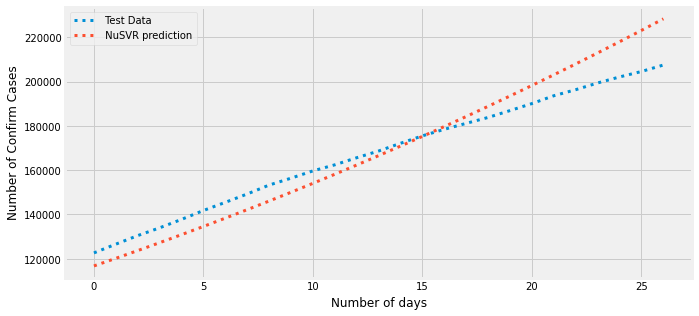

In [ ]:
bd_Nu_svm_test,w_nusvr,bd_Nu_svm_pred = Nu_svr(days_since_3_8[:135], bd_total_cases,X_train_confirmed, y_train_confirmed, X_test_confirmed, y_test_confirmed, future_forcast, plt,'con')
print(len(bd_Nu_svm_pred))
print(w_nusvr)

In [ ]:
print(bd_Nu_svm_pred[129])

194860.64278939852


##Polynomial Linear Regresion

MAE: 12386.608134605305
MSE: 160945836.16389212
RMSE: 12686.443006764825
2.515250356994735


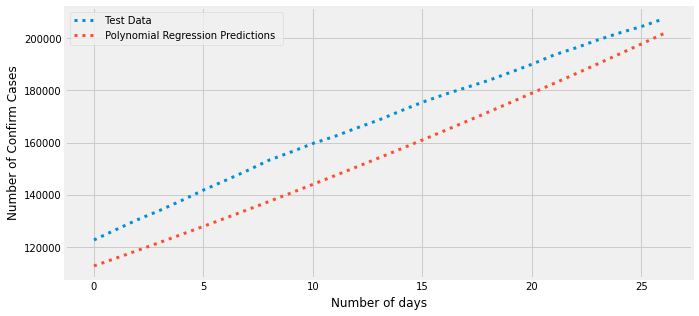

In [ ]:
bangladesh_linear_test,w_poly,bangladesh_linear_pred = polynomial_fun(days_since_3_8[:135], bd_total_cases,X_train_confirmed, y_train_confirmed, X_test_confirmed, y_test_confirmed, future_forcast, plt,'con')
# print(len(bangladesh_linear_pred))
print(w_poly)

**Ensemble test pred**

In [ ]:
# weight_svm = w_svm/(w_nusvr+w_poly+w_svm+w_arima)
# weight_nusvr = w_nusvr/(w_nusvr+w_poly+w_svm+w_arima)
# weight_poly = w_poly/(w_nusvr+w_poly+w_svm+w_arima)
# weight_arima = 1-(weight_nusvr+weight_poly+weight_svm)

In [ ]:
# print(weight_svm)
# print(weight_nusvr)
# print(weight_poly)
# print(weight_arima)

In [ ]:
# ensemble_test_pred = []
# for i in range(len(y_test_confirmed)):
#   ensemble_test_pred.append((bd_arima_pred[i]*weight_arima)+(bd_svm_pred[i]*weight_svm)+(bd_Nu_svm_pred[i]*weight_nusvr)+(bangladesh_linear_pred[i]*weight_poly))
# mse = mean_squared_error(ensemble_test_pred,y_test_confirmed)
# RMSE = math.sqrt(mse)
# print('Test MSE:', mse)
# print('Test RMSE:',RMSE)

In [ ]:
  # fig=plt.figure(figsize=(10,5))
  # plt.plot(y_test_confirmed,linestyle='dotted',lw=3)
  # plt.plot(ensemble_test_pred,linestyle='dotted',lw=3)
  # plt.ylabel('Number of confirmed Cases')
  # plt.xlabel('Number of days')
  # plt.legend([" Test Data "," Ensemble model prediction"])
  # #fig.savefig('/content/drive/My Drive/Covid-test-graph/'+"ARIMATEST_"+case+'.png')
  # fig.savefig('ensemble_con.png')

#Future Forecasting for Confirmed Case

## Future prediction using SVM

In [ ]:
# Future Forecasting using SVM
bangladesh_svm_df = pd.DataFrame({'Date': f_forcast_dates[-30:], 'SVM Predicted # of Confirmed Cases Bangladesh': np.round(bd_svm_pred[-30:])})
bangladesh_svm_df.iloc[-5:]

,Date,SVM Predicted # of Confirmed Cases Bangladesh
25,08/15/2020,383566.0
26,08/16/2020,390874.0
27,08/17/2020,398273.0
28,08/18/2020,405765.0
29,08/19/2020,413348.0


## Future Forecasting using Polynomial Lin. Regression

In [ ]:
#bangladesh_linear_pred
# Future predictions using polynomial regression
linear_pred = bangladesh_linear_pred.reshape(1,-1)[0]
bangladesh_poly_df = pd.DataFrame({'Date': f_forcast_dates[-30:], 'Polynomial Predicted # of Confirmed Cases Bangladesh': np.round(linear_pred[-30:])})
bangladesh_poly_df.iloc[-5:]

,Date,Polynomial Predicted # of Confirmed Cases Bangladesh
25,08/15/2020,339132.0
26,08/16/2020,344439.0
27,08/17/2020,349786.0
28,08/18/2020,355174.0
29,08/19/2020,360603.0


##Future Forecasting using NuSVR

In [ ]:
bd_Nu_svm_pred=bd_Nu_svm_pred.reshape(1,-1)[0]
bangladesh_Nu_svr_df = pd.DataFrame({'Date': f_forcast_dates[-30:], 'NuSVM Predicted # of Confirmed Cases Bangladesh': np.round(bd_Nu_svm_pred[-30:])})
bangladesh_Nu_svr_df.iloc[-5:]

,Date,NuSVM Predicted # of Confirmed Cases Bangladesh
25,08/15/2020,369381.0
26,08/16/2020,376300.0
27,08/17/2020,383305.0
28,08/18/2020,390398.0
29,08/19/2020,397578.0


##Future Forecasting using ARIMA

In [ ]:
bd_con_arima_pred=np.array(bd_con_arima_pred).reshape(1,-1)[0]
bd_con_arima_df = pd.DataFrame({'Date': f_forcast_dates[-30:], 'ARIMA Predicted # of Confirmed Cases Bangladesh': np.round(bd_con_arima_pred[-30:])})
bd_con_arima_df.iloc[-5:]

,Date,ARIMA Predicted # of Confirmed Cases Bangladesh
25,08/15/2020,276390.0
26,08/16/2020,278917.0
27,08/17/2020,281435.0
28,08/18/2020,283945.0
29,08/19/2020,286446.0


#Plotting Models for Confirmed Cases

In [ ]:
bd_cases=bd_total_cases

In [ ]:
bd_con_arima_pred[0]

210181.41381346338

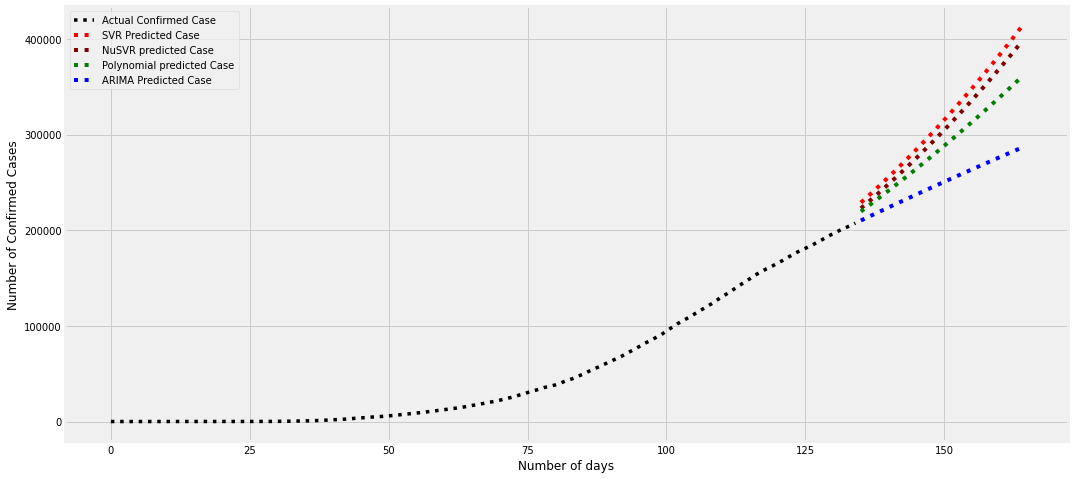

In [ ]:
fig=plt.figure(figsize=(16,8))
plt.plot(bd_cases,color='black',linestyle='dotted',lw=3.5)
plt.plot(range(135,165),bd_svm_pred[135:165],color='red',linestyle='dotted')
plt.plot(range(135,165),bd_Nu_svm_pred[135:165],color='maroon',linestyle='dotted')
plt.plot(range(135,165),bangladesh_linear_pred[135:165],color='green',linestyle='dotted')
plt.plot(range(135,165),bd_con_arima_pred,color='blue',linestyle='dotted')
plt.ylabel('Number of Confirmed Cases')
plt.xlabel('Number of days')
plt.legend(['Actual Confirmed Case','SVR Predicted Case','NuSVR predicted Case','Polynomial predicted Case','ARIMA Predicted Case'])
fig.savefig('/content/drive/My Drive/Covid-test-graph/'+'Combine_conf.png')

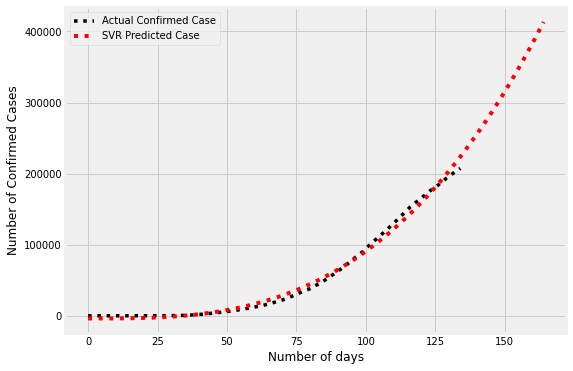

In [ ]:
fig1=plt.figure(figsize=(8,6))
plt.plot(bd_cases,color='black',linestyle='dotted',lw=3.5)
plt.plot(bd_svm_pred,color='red',linestyle='dotted')
plt.ylabel('Number of Confirmed Cases')
plt.xlabel('Number of days')
plt.legend(['Actual Confirmed Case','SVR Predicted Case'])
fig1.savefig('SVR.png')

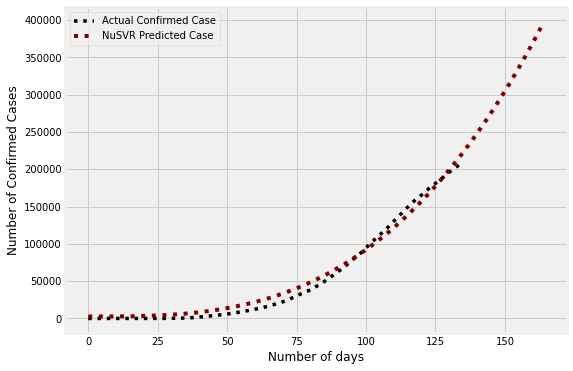

In [ ]:
fig1=plt.figure(figsize=(8,6))
plt.plot(bd_cases,color='black',linestyle='dotted',lw=3.5)
plt.plot(bd_Nu_svm_pred,color='maroon',linestyle='dotted')
plt.ylabel('Number of Confirmed Cases')
plt.xlabel('Number of days')
plt.legend(['Actual Confirmed Case','NuSVR Predicted Case'])
fig1.savefig('NuSVR.png')

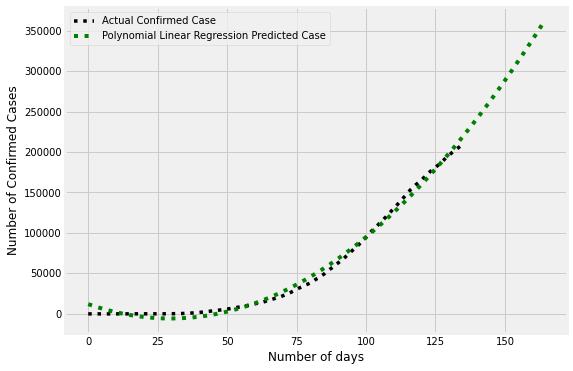

In [ ]:
fig1=plt.figure(figsize=(8,6))
plt.plot(bd_cases,color='black',linestyle='dotted',lw=3.5)
plt.plot(linear_pred,color='green',linestyle='dotted')
plt.ylabel('Number of Confirmed Cases')
plt.xlabel('Number of days')
plt.legend(['Actual Confirmed Case','Polynomial Linear Regression Predicted Case'])
fig1.savefig('Poly.png')

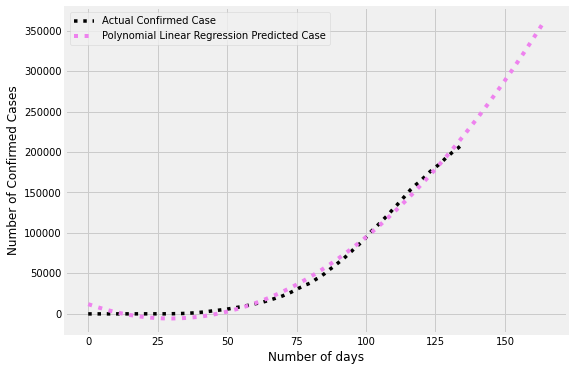

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(bd_cases,color='black',linestyle='dotted',lw=3.5)
plt.plot(linear_pred,color='violet',linestyle='dotted')
plt.ylabel('Number of Confirmed Cases')
plt.xlabel('Number of days')
plt.legend(['Actual Confirmed Case','Polynomial Linear Regression Predicted Case'])

#Death Case Analysis


In [ ]:
total_deaths=bd_total_deaths[:135]

In [ ]:
total_deaths[134]

2668

In [ ]:
# split dataset for train
X_train_death, X_test_death, y_train_death, y_test_death = train_test_split(days_since_3_8[:135], total_deaths, test_size=0.25, shuffle=False)
print("[Bangladesh: Death cases] Xtrain:{} Ytrain{}".format(len(X_train_death), len(y_train_death))) 

[Bangladesh: Death cases] Xtrain:101 Ytrain101


##SVM


MAE: 178.18622122822597
MSE: 34435.54106986916
RMSE: 185.56815747824075
RMSE Main: 120.70806247078542
W: 2.2877221182648593
165
2.2877221182648593


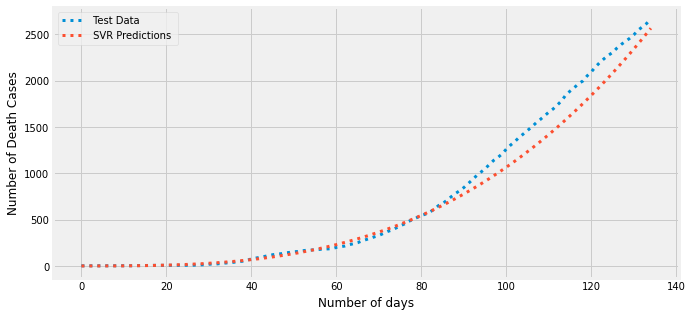

In [ ]:
bd_death_svm_test ,w2_svr,bd_death_svm_pred  = svm_fun(days_since_3_8[:135], total_deaths,X_train_death, y_train_death, X_test_death, y_test_death, future_forcast, plt,'death')
print(len(bd_death_svm_pred))
print(w2_svr)

##NuSVR

MAE: 92.63445408310255
MSE: 17049.678197116515
RMSE: 130.57441631926415
165
0.5789977373656076


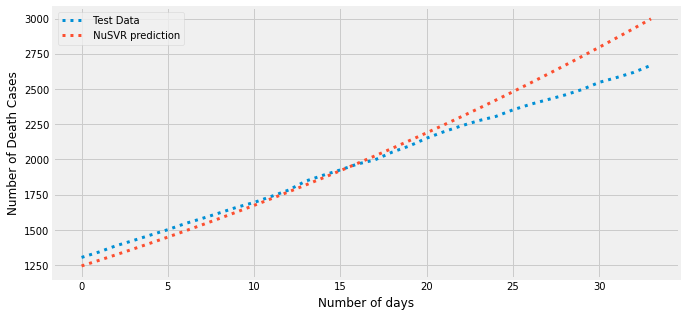

In [ ]:
bd_death_Nu_svm_test ,w2_nusvr,bd_death_Nu_svm_pred  = Nu_svr(days_since_3_8[:135], total_deaths,X_train_death, y_train_death, X_test_death, y_test_death, future_forcast, plt,'death')
print(len(bd_death_Nu_svm_pred))
print(w2_nusvr)

##Polynomial Linear Regression


MAE: 246.99578849376613
MSE: 63472.9251668578
RMSE: 251.93833604050377
165
2.6928566042709976


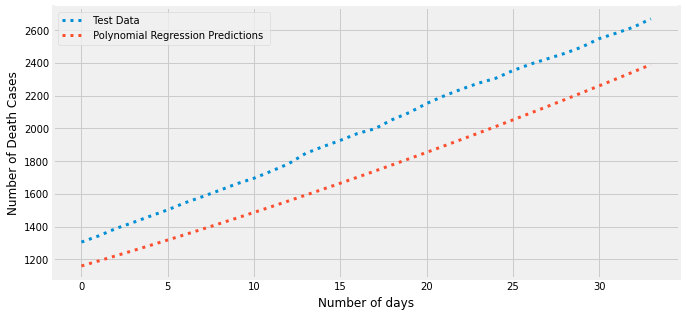

In [ ]:
bangladesh_death_linear_test, w2_poly,bangladesh_death_linear_pred = polynomial_fun(days_since_3_8[:135], total_deaths,X_train_death, y_train_death, X_test_death, y_test_death, future_forcast, plt,'death')
print(len(bangladesh_death_linear_pred))
print(w2_poly)

##ARIMA



In [ ]:
# evaluate parameters
p_values = [0, 1, 2, 3]
d_values = [0, 1, 2]
q_values = [0, 1, 2, 3]
warnings.filterwarnings("ignore")
order=evaluate_models(y_train_death,y_test_death ,p_values, d_values, q_values)

ARIMA(0, 0, 1) MSE=599036.605
ARIMA(0, 1, 1) MSE=288.633
ARIMA(0, 1, 2) MSE=219.393
ARIMA(0, 2, 1) MSE=69.170
ARIMA(1, 0, 0) MSE=1766.910
ARIMA(1, 1, 0) MSE=105.289
ARIMA(1, 2, 0) MSE=86.014
ARIMA(1, 2, 1) MSE=70.505
ARIMA(2, 1, 0) MSE=84.548
ARIMA(2, 2, 0) MSE=83.332
ARIMA(2, 2, 1) MSE=75.400
ARIMA(3, 1, 0) MSE=79.819
ARIMA(3, 2, 0) MSE=84.026
ARIMA(3, 2, 1) MSE=79.679
Best ARIMA(0, 2, 1) MSE=69.170


[1305, 1343, 1388, 1425, 1464, 1502, 1545, 1582, 1621, 1661, 1695, 1738, 1783, 1847, 1888, 1926, 1968, 1997, 2052, 2096, 2151, 2197, 2238, 2275, 2305, 2352, 2391, 2424, 2457, 2496, 2547, 2581, 2618, 2668]
Test MSE: %.3f 69.16992680578132
Test RMSE: %.3f 8.316845965014702


NameError: ignored

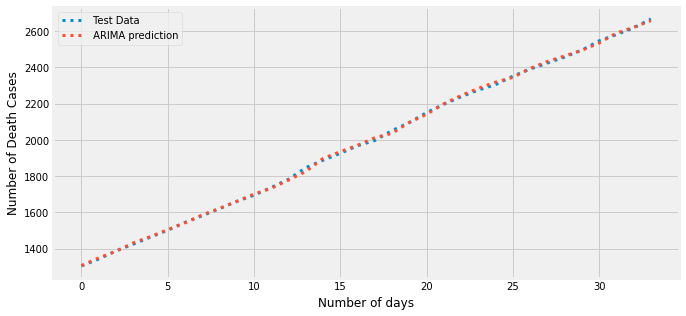

In [ ]:
bd_death_arima_test,w2_arima,bd_death_arima_pred = ARIMA_fun(days_since_3_8[:135], total_deaths,X_train_death, y_train_death, X_test_death, y_test_death,order, future_forcast, plt,'death')
print(w2_arima)

In [ ]:
# weight_svm = w2_svr/(w2_nusvr+w2_poly+w2_svr+w2_arima)
# weight_nusvr = w2_nusvr/(w2_nusvr+w2_poly+w2_svr+w2_arima)
# weight_poly = w2_poly/(w2_nusvr+w2_poly+w2_svr+w2_arima)
# weight_arima = 1-(weight_nusvr+weight_poly+weight_svm)
# print(weight_svm)
# print(weight_nusvr)
# print(weight_poly)
# print(weight_arima)

In [ ]:
# ensemble_test_pred = []
# for i in range(len(y_test_confirmed)):
#   ensemble_test_pred.append((bd_arima_pred[i]*weight_arima)+(bd_svm_pred[i]*weight_svm)+(bd_Nu_svm_pred[i]*weight_nusvr)+(bangladesh_linear_pred[i]*weight_poly))
# mse = mean_squared_error(ensemble_test_pred,y_test_confirmed)
# RMSE = math.sqrt(mse)
# print('Test MSE:', mse)
# print('Test RMSE:',RMSE)
  

In [ ]:
  # fig=plt.figure(figsize=(10,5))
  # plt.plot(y_test_confirmed,linestyle='dotted',lw=3)
  # plt.plot(ensemble_test_pred,linestyle='dotted',lw=3)
  # plt.ylabel('Number of confirmed Cases')
  # plt.xlabel('Number of days')
  # plt.legend([" Test Data "," Ensemble model prediction"])
  # #fig.savefig('/content/drive/My Drive/Covid-test-graph/'+"ARIMATEST_"+case+'.png')
  # #fig.savefig('ensemble_death.png')

#Future Forecasting for Death Cases

##Future prediction using SVM

In [ ]:
# Future Forecasting using SVM
bangladesh_death_svm_df = pd.DataFrame({'Date': f_forcast_dates[-30:], 'SVM Predicted # of Death Cases Bangladesh': np.round(bd_death_svm_pred [-30:])})
bangladesh_death_svm_df.iloc[-5:]

## Future Forecasting using Polynomial Lin. Regression

In [ ]:
#bangladesh_linear_pred
# Future predictions using polynomial regression
death_linear_pred = bangladesh_death_linear_pred .reshape(1,-1)[0]
bangladesh_death_poly_df = pd.DataFrame({'Date': f_forcast_dates[-30:], 'Polynomial Predicted # of Death Cases Bangladesh': np.round(death_linear_pred[-30:])})
bangladesh_death_poly_df.iloc[-5:]

##Future Forecasting using NuSVR

In [ ]:
#NuSVR
bangladesh_death_Nu_svr_df = pd.DataFrame({'Date': f_forcast_dates[-30:], 'NuSVM Predicted # of Death Cases Bangladesh': np.round(bd_death_Nu_svm_pred[-30:])})
bangladesh_death_Nu_svr_df.iloc[-5:]

#Plotting Models for Death Cases

In [ ]:
fig=plt.figure(figsize=(8,6))
plt.plot(total_deaths,color='black',linestyle='dotted',lw=3.5)
plt.plot(bd_death_svm_pred,color='red',linestyle='dotted')
plt.plot(bd_death_Nu_svm_pred,color='maroon',linestyle='dotted')
#plt.plot(death_log_pred,color='blue',linestyle='dotted')
plt.plot(death_linear_pred,color='green',linestyle='dotted')
#plt.plot(death_bayes_pred,color='green',linestyle='dotted')
print(len(bd_death_arima_pred,color='blue',linestyle='dotted')
plt.ylabel('Number of Death Cases')
plt.xlabel('Number of days')
plt.legend(['Actual Death Case','SVM Predicted case','NuSVR predicted Case','Polynomial predicted case','ARIMA Predicted Case'])
fig.savefig('death_fig.png')

In [ ]:
fig1=plt.figure(figsize=(8,6))
plt.plot(total_deaths,color='black',linestyle='dotted',lw=3.5)
plt.plot(bd_death_svm_pred,color='red',linestyle='dotted')
plt.ylabel('Number of Death Cases')
plt.xlabel('Number of days')
plt.legend(['Actual Death Case','SVR Predicted Case'])
fig1.savefig('SVR_death.png')

In [ ]:
fig1=plt.figure(figsize=(8,6))
plt.plot(total_deaths,color='black',linestyle='dotted',lw=3.5)
plt.plot(bd_death_Nu_svm_pred,color='maroon',linestyle='dotted')
plt.ylabel('Number of Death Cases')
plt.xlabel('Number of days')
plt.legend(['Actual Death Case','NuSVR Predicted Case'])
fig1.savefig('NuSVR_death.png')

In [ ]:
fig1=plt.figure(figsize=(8,6))
plt.plot(total_deaths,color='black',linestyle='dotted',lw=3.5)
plt.plot(death_linear_pred,color='green',linestyle='dotted')
plt.ylabel('Number of death Cases')
plt.xlabel('Number of days')
plt.legend(['Actual Death Case','Polynomial Linear Regression Predicted Case'])
fig1.savefig('Poly_death.png')

#Recovery Case Analysis

In [ ]:
# split dataset and call svm
total_recoveries = bd_total_recovered[:135]
X_train_recovered, X_test_recovered, y_train_recovered, y_test_recovered = train_test_split(days_since_3_8[:135], total_recoveries, test_size=0.25, shuffle=False)
print("[Bangladesh: Confirmed cases] Xtrain:{} Ytrain{}".format(len(X_train_recovered), len(y_train_recovered))) 

[Bangladesh: Confirmed cases] Xtrain:101 Ytrain101


##SVM

MAE: 43316.647395880274
MSE: 2148099509.906489
RMSE: 46347.59443494871
RMSE Main: 7564.578969524871
W: 1.3784924470826192
165


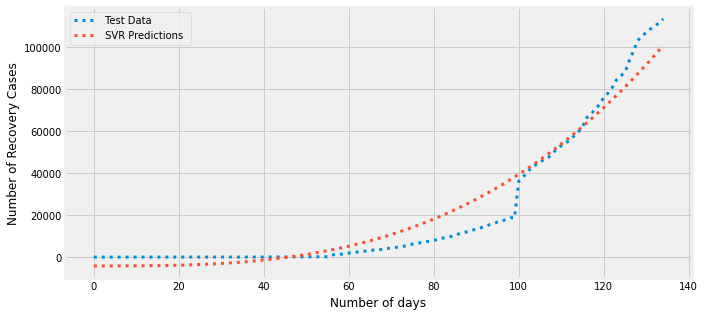

In [ ]:
bd_recovered_svm_test, w3_svm,bd_recovered_svm_pred = svm_fun(days_since_3_8[:135], total_recoveries,X_train_recovered, y_train_recovered, X_test_recovered, y_test_recovered, future_forcast, plt,'rec')
print(len(bd_recovered_svm_pred))

##NuSVR

In [ ]:
bd_recovered_Nu_svm_test,w3_nusvr,bd_recovered_Nu_svm_pred = Nu_svr(days_since_3_8[:135], total_recoveries,X_train_recovered, y_train_recovered, X_test_recovered, y_test_recovered, future_forcast, plt,'rec')
print(len(bd_recovered_Nu_svm_pred ))
print(w3_nusvr)

##Polynomial Linear Regression

In [ ]:
bangladesh_recovered_linear_test ,w3_poly,bangladesh_recovered_linear_pred  = polynomial_fun(days_since_3_8[:135], total_recoveries,X_train_recovered, y_train_recovered, X_test_recovered, y_test_recovered, future_forcast, plt,'rec')
print(len(bangladesh_recovered_linear_pred ))
print(w3_poly)

##ARIMA

In [ ]:
# evaluate parameters
p_values = [0, 1, 2, 3]
d_values = [0, 1, 2]
q_values = [0, 1, 2, 3]
warnings.filterwarnings("ignore")
order=evaluate_models(y_train_recovered,y_test_recovered ,p_values, d_values, q_values)

In [ ]:
bd_rec_arima_pred,w3_arima,bd_rec_arima_pred = ARIMA_fun(days_since_3_8[:135], total_recoveriesX_train_recovered, y_train_recovered, X_test_recovered, y_test_recovered,order, future_forcast, plt,'rec')

#Future Forecasting for Reovery Cases 

##Future prediction using SVM

In [ ]:
# Future Forecasting using SVM
bangladesh_recovered_svm_df = pd.DataFrame({'Date': f_forcast_dates[-30:], 'SVM Predicted # of Recovery Cases Bangladesh': np.round(bd_recovered_svm_pred [-30:])})
bangladesh_recovered_svm_df.iloc[-5:]

## Future Forecasting using Polynomial Lin. Regression

In [ ]:
#bangladesh_linear_pred
# Future predictions using polynomial regression
recovered_linear_pred = bangladesh_recovered_linear_pred .reshape(1,-1)[0]
bangladesh_recovered_poly_df = pd.DataFrame({'Date': f_forcast_dates[-30:], 'Polynomial Predicted # of Recovery Cases Bangladesh': np.round(recovered_linear_pred[-30:])})
bangladesh_recovered_poly_df.iloc[-5:]

##Future Forecasting using NuSVR

In [ ]:
#NuSVR
bangladesh_recovered_Nu_svr_df = pd.DataFrame({'Date': f_forcast_dates[-30:], 'NuSVM Predicted # of Recovery Cases Bangladesh': np.round(bd_recovered_Nu_svm_pred[-30:])})
bangladesh_recovered_Nu_svr_df.iloc[-5:]

#Plotting Models for Recovery Cases

In [ ]:
total_recovered=total_recoveries

In [ ]:
fig=plt.figure(figsize=(8,6))
plt.plot(total_recovered,color='black',linestyle='dotted',lw=3.5)
plt.plot(bd_recovered_svm_pred,color='red',linestyle='dotted')
plt.plot(bd_recovered_Nu_svm_pred,color='maroon',linestyle='dotted')
#plt.plot(bd_rec_arima_pred,color='blue',linestyle='dotted')
plt.plot(recovered_linear_pred,color='green',linestyle='dotted')
plt.plot(bd_rec_arima_pred,color='blue',linestyle='dotted')otted')
plt.ylabel('Number of Recovery Cases')
plt.xlabel('Number of days')
plt.legend(['Actual Death Case','SVR Predicted case','NuSVR predicted Case','Polynomial Predicted Case','ARIMA PRedicted Case'])
fig.savefig('rec.png')

In [ ]:
fig1=plt.figure(figsize=(8,6))
plt.plot(total_recovered,color='black',linestyle='dotted',lw=3.5)
plt.plot(bd_recovered_svm_pred,color='red',linestyle='dotted')
plt.ylabel('Number of Recovered Cases')
plt.xlabel('Number of days')
plt.legend(['Actual Recovered Case','SVR Predicted Case'])
fig1.savefig('SVR_rec.png')

In [ ]:
fig1=plt.figure(figsize=(8,6))
plt.plot(total_recovered,color='black',linestyle='dotted',lw=3.5)
plt.plot(bd_recovered_Nu_svm_pred,color='maroon',linestyle='dotted')
plt.ylabel('Number of Recovered Cases')
plt.xlabel('Number of days')
plt.legend(['Actual Death Case','NuSVR Predicted Case'])
fig1.savefig('NuSVR_rec.png')

In [ ]:
fig1=plt.figure(figsize=(8,6))
plt.plot(total_recovered,color='black',linestyle='dotted',lw=3.5)
plt.plot(recovered_linear_pred,color='green',linestyle='dotted')
plt.ylabel('Number of Recovered Cases')
plt.xlabel('Number of days')
plt.legend(['Actual Recovered Case','Polynomial Linear Regression Predicted Case'])
fig1.savefig('Poly_rec.png')